In [ ]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

--2023-07-02 03:56:22--  https://shorturl.at/BLXZ5
Resolving shorturl.at (shorturl.at)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3121::, ...
Connecting to shorturl.at (shorturl.at)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/BLXZ5 [following]
--2023-07-02 03:56:23--  https://www.shorturl.at/BLXZ5
Resolving www.shorturl.at (www.shorturl.at)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to www.shorturl.at (www.shorturl.at)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv [following]
--2023-07-02 03:56:23--  https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
def lower(string):
    string = string.lower()

    return string

In [ ]:
df.Message = df.Message.apply(lower)

In [ ]:
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
X = df.Message
y = df.Category

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipeline = Pipeline([('vectorizer', CountVectorizer(stop_words = 'english')), ('model', MultinomialNB())]) # vectorizer ra model ko algorith jun use garna pani paucha

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('model', MultinomialNB())])

In [ ]:
accuracy = pipeline.score(X_test, y_test)
accuracy

0.9865470852017937

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[961,   5],
       [ 10, 139]])

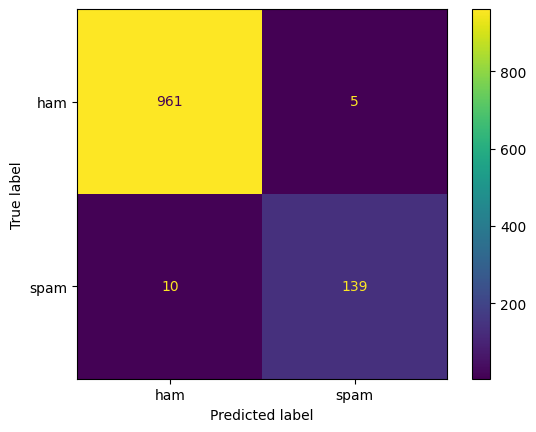

In [ ]:
fig = ConfusionMatrixDisplay(cm, display_labels = pipeline.classes_)
fig.plot()

In [ ]:
import pickle

In [ ]:
with open('model.pickle', 'wb') as file:
    pickle.dump(pipeline, file)